In [ ]:
!pip install wandb

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

In [ ]:
wandb.init(project="Akhond_Detector")

In [ ]:
train_dataset_path = "/content/drive/MyDrive/Sheykh-Recognition"
width = height = 299
batch_size = 32

idg = ImageDataGenerator(
    rescale = 1./255,

    #Augmentation
    horizontal_flip = True,
    rotation_range = 10,
    brightness_range = (0.8, 1.2),
    shear_range = 0.2,
    zoom_range = 0.1,
    validation_split = 0.2
)

train_data = idg.flow_from_directory(
    train_dataset_path,
    target_size = (width, height),
    class_mode = "categorical",
    batch_size = batch_size,
    subset = "training"
)

val_data = idg.flow_from_directory(
    train_dataset_path,
    target_size = (width, height),
    class_mode = "categorical",
    batch_size = batch_size,
    subset = "validation"
)

Found 212 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


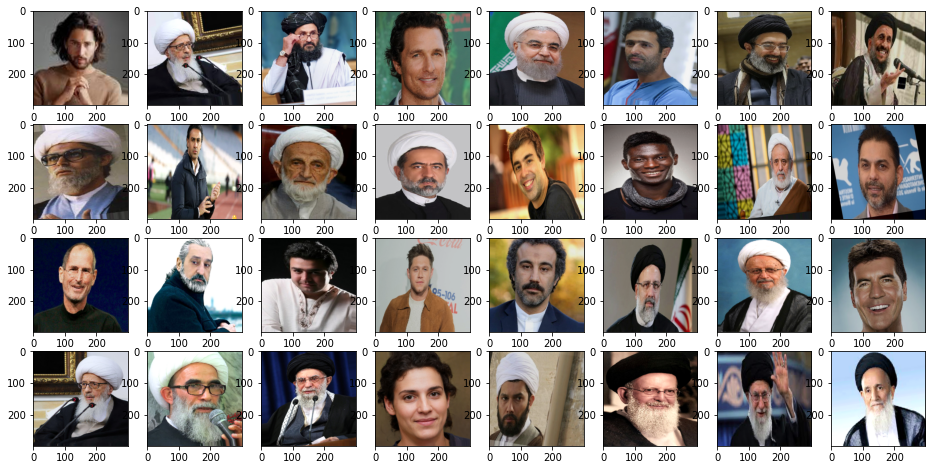

In [ ]:
X, Y = next(train_data)

plt.figure(figsize=(16, 8))

for i in range(32):
  plt.subplot(4, 8, i+1)
  plt.imshow(X[i])

### Model

In [ ]:
base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(width, height, 3)
)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
    base_model,
    Flatten(),
    Dense(256, activation="relu"),
    Dense(512, activation="relu"),
    Dense(2, activation="softmax")
])

In [ ]:
model.summary()

In [ ]:
config = wandb.config
config.learning_rate = 0.001

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["accuracy"])

In [ ]:
model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[WandbCallback()])

Epoch 1/10
7/7 [==============================] - 20s 2s/step - loss: 19.9349 - accuracy: 0.5472 - val_loss: 5.1353 - val_accuracy: 0.7692 - _timestamp: 1647390382.0000 - _runtime: 79.0000
Epoch 2/10
7/7 [==============================] - 14s 2s/step - loss: 2.8614 - accuracy: 0.8538 - val_loss: 2.1808 - val_accuracy: 0.8462 - _timestamp: 1647390395.0000 - _runtime: 92.0000
Epoch 3/10
7/7 [==============================] - 11s 2s/step - loss: 1.3908 - accuracy: 0.9292 - val_loss: 2.8474 - val_accuracy: 0.8654 - _timestamp: 1647390409.0000 - _runtime: 106.0000
Epoch 4/10
7/7 [==============================] - 11s 2s/step - loss: 1.5890 - accuracy: 0.9292 - val_loss: 3.3671 - val_accuracy: 0.8462 - _timestamp: 1647390420.0000 - _runtime: 117.0000
Epoch 5/10
7/7 [==============================] - 11s 2s/step - loss: 1.1168 - accuracy: 0.9245 - val_loss: 3.1576 - val_accuracy: 0.9231 - _timestamp: 1647390431.0000 - _runtime: 128.0000
Epoch 6/10
7/7 [==============================] - 13s 2s

In [ ]:
X_test, Y_test = val_data.next()

In [ ]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 2s 2s/step - loss: 2.3405e-05 - accuracy: 1.0000


[2.340468199690804e-05, 1.0]

In [ ]:
model.save("drive/MyDrive/Akhond_Detector/akhondDetector.h5")